In [1]:
%matplotlib inline

import os
# assumes jupyter server launched from root dir of repo
filepath = os.path.abspath(os.path.join(os.getcwd(), '..'))
%cd $filepath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append(os.path.abspath(filepath))

from common import *
from notebooks.eval_util import *

/Users/cyz/survey/active_survey


Using TensorFlow backend.


In [2]:
# Suppress verbose warnings about missing fonts
import warnings
warnings.simplefilter('ignore')

In [3]:
dataset = 'cces18'
sim_objects_filename = '{}/data/{}-sim-objects.pkl'.format(filepath, dataset)
response_filename = filepath + '/data/cces/cces18_cs.csv'
question_filename = filepath + "/data/cces/cces18_questions_short.csv"

In [4]:
sim_objects = deserialize(sim_objects_filename)

In [5]:
responses = pd.read_csv(response_filename, index_col=0)
questions = responses.columns.tolist()

In [6]:
question_df = pd.read_csv(question_filename, index_col=0)
question_to_label = {row['question']: row['text'] for index, row in question_df.iterrows()}
question_to_label

{'CC18_301': 'National Economy',
 'CC18_302': 'Past year household income',
 'CC18_308a': 'Job approval - Trump',
 'CC18_308b': 'Job approval - Congress',
 'CC18_308c': 'Job approval - Supreme Court',
 'CC18_320a': 'Gun Control - Background checks',
 'CC18_320c': 'Gun Control - Ban assault rifles',
 'CC18_320d': 'Gun Control - Easier concealed-carry',
 'CC18_321a': 'Abortion - Always allow',
 'CC18_321b': 'Abortion - Only in case of rape, incest',
 'CC18_321c': 'Abortion - Ban after 20th week',
 'CC18_321d': 'Abortion - Decline insurance coverage',
 'CC18_321e': 'Abortion - No federal funds',
 'CC18_321f': 'Abortion - Always illegal',
 'CC18_322a': 'Immigration - Border wall',
 'CC18_322b': 'Immigration - DACA',
 'CC18_322c_new': 'Immigration - End visa lottery, family-based',
 'CC18_322d_new': 'Immigration - All of above',
 'CC18_322c': 'Immigration - Local police cooperation',
 'CC18_322f': 'Immigration - Imprison previous deportees',
 'CC18_325a': 'Taxes - Cut corporate rate to 21%'

In [7]:
alpha = 1

Extracting cache for 10 simulations
Extracting cache for 1 simulations
Extracting cache for 10 simulations


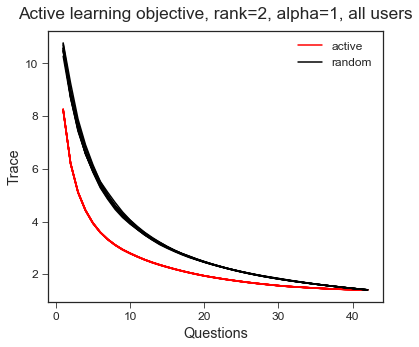

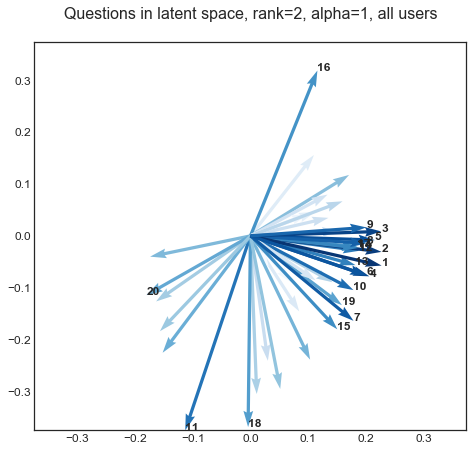

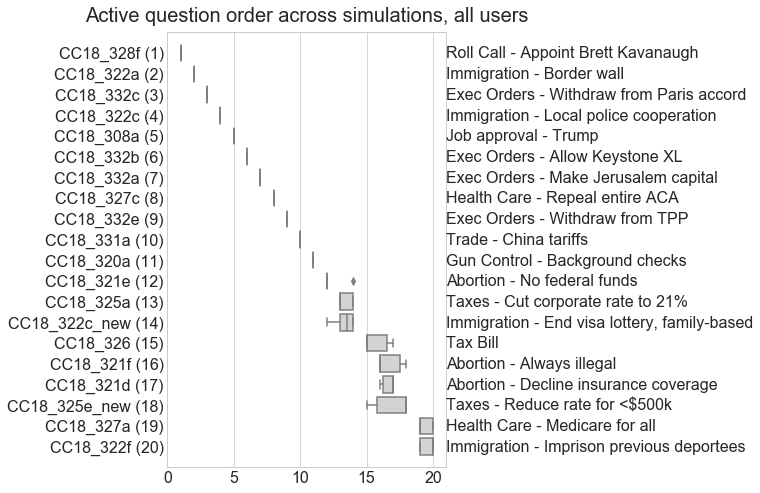

In [8]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})
plot_objective(sim_objects,
               rank=2, optimality_type='A', v_method='row-norm', alpha=alpha)
plot_question_order(sim_objects, questions,
                    rank=2, optimality_type='A', v_method='row-norm', alpha=alpha,
                    max_labels=20, max_plots=1)
plot_question_ranks(sim_objects, questions,
                    rank=2, optimality_type='A', v_method='row-norm', alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label,
                    show_max_questions=20)

Extracting cache for 10 simulations
Extracting cache for 10 simulations


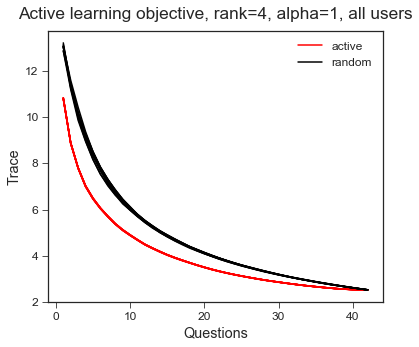

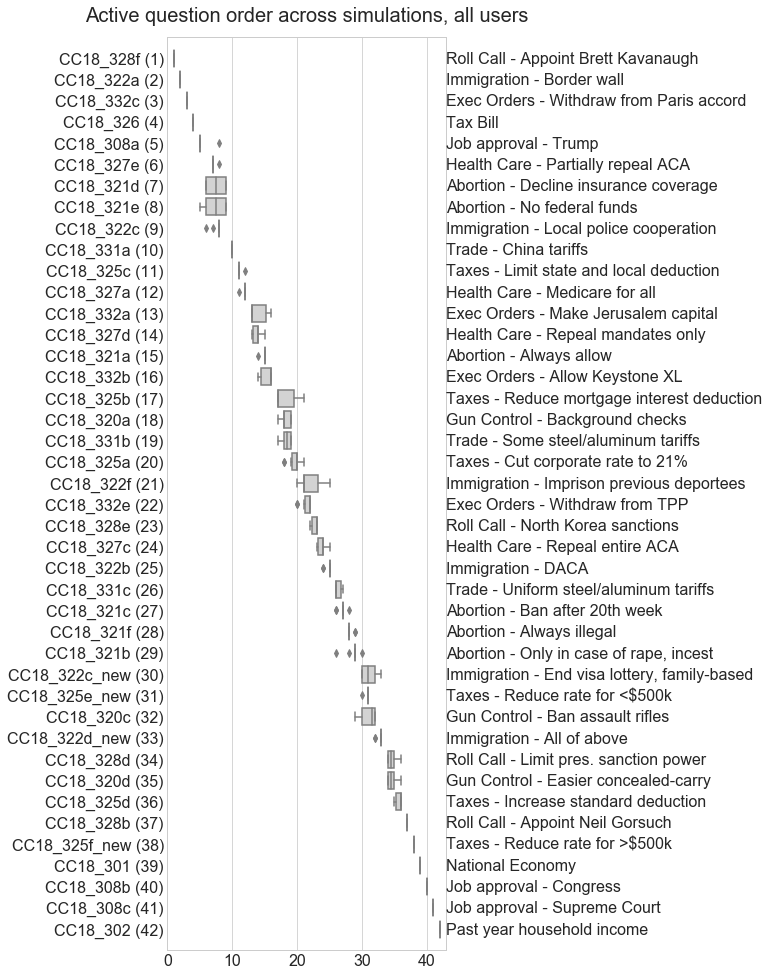

In [9]:
plot_objective(sim_objects,
               rank=4, optimality_type='A', v_method='row-norm', alpha=alpha)
plot_question_ranks(sim_objects, questions,
                    rank=4, optimality_type='A', v_method='row-norm', alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label)

Extracting cache for 10 simulations


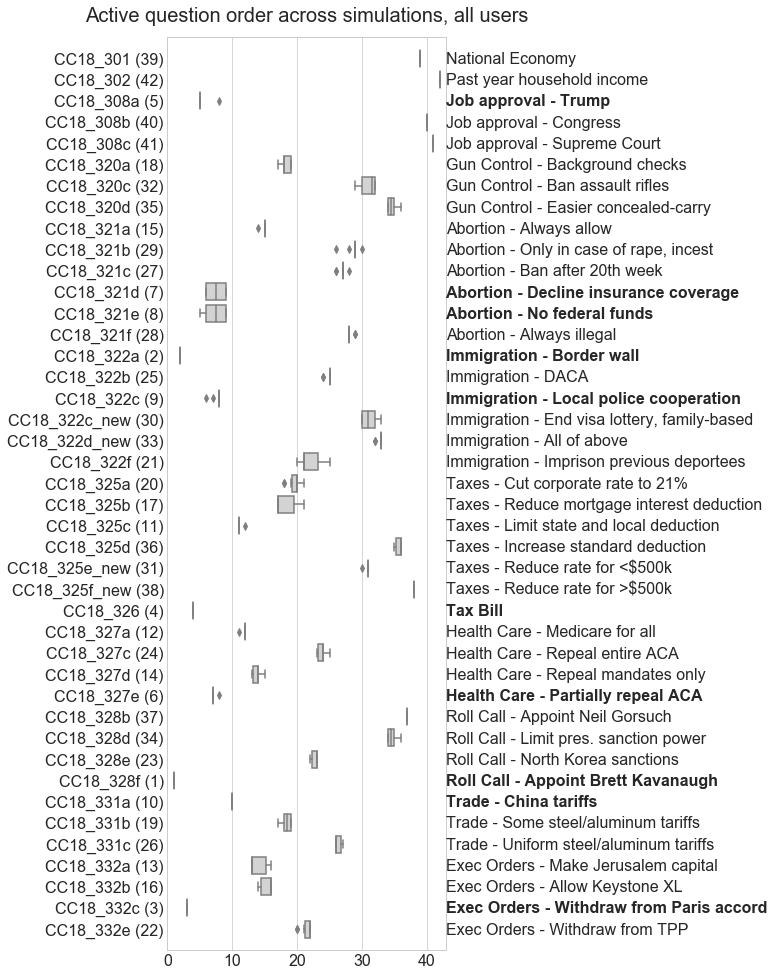

In [10]:
plot_question_ranks(sim_objects, questions,
                    rank=4, optimality_type='A', v_method='row-norm', alpha=alpha,
                    show_question_labels=True, question_to_label=question_to_label, 
                    sort_by_rank=False)

f328db6c-87d6-49ee-acfb-d7900905d30b_active


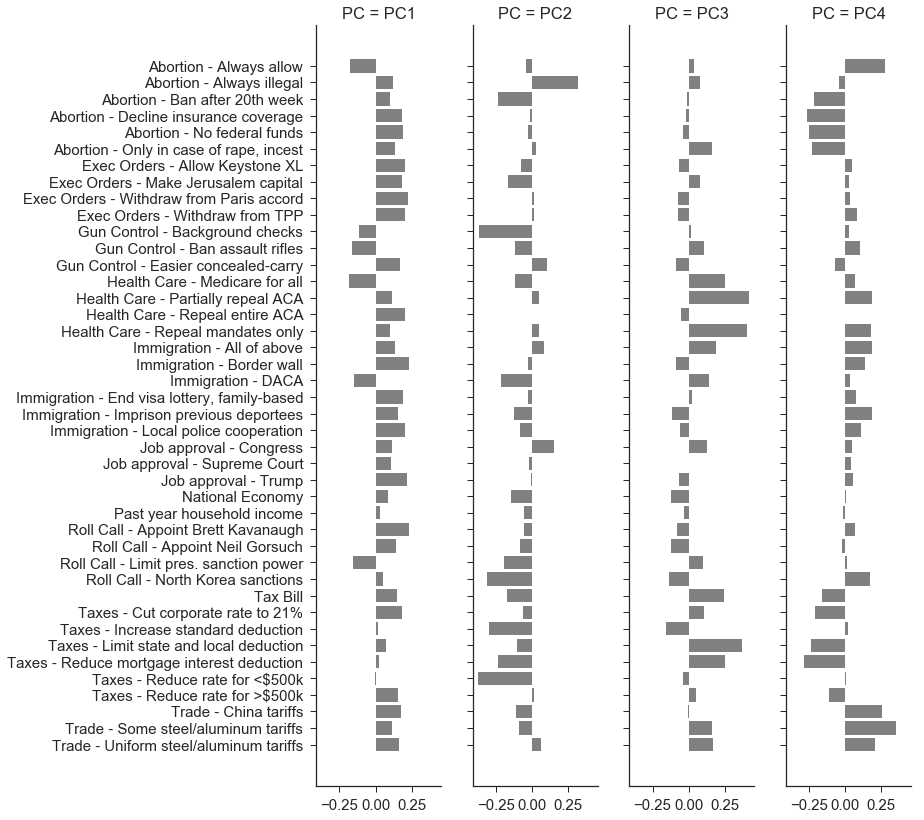

In [13]:
V_filename = None  #'{}/data/{}-V.csv'.format(filepath, dataset)
display_V(sim_objects, questions, question_to_label,
          rank=4, optimality_type='A', v_method='row-norm', alpha=alpha, 
          filename=V_filename, aspect=0.28)